In [1]:
#importing Required Library 
import pandas as pd
import matplotlib.pyplot as plt   
%matplotlib inline

In [2]:
df=pd.read_csv("rec-crime-pfa.csv") # import data from the CSV file to Data Frame

In [3]:
df.head()    #Readinf the Data Frame

,12 months ending,PFA,Region,Offence,Rolling year total number of offences
0,31/03/2003,Avon and Somerset,South West,All other theft offences,25959
1,31/03/2003,Avon and Somerset,South West,Bicycle theft,3090
2,31/03/2003,Avon and Somerset,South West,Criminal damage and arson,26202
3,31/03/2003,Avon and Somerset,South West,Death or serious injury caused by illegal driving,2
4,31/03/2003,Avon and Somerset,South West,Domestic burglary,14561


In [4]:
df.columns  # data Exporatary Analysis(EDA)

Index(['12 months ending', 'PFA', 'Region', 'Offence',
       'Rolling year total number of offences'],
      dtype='object')

In [5]:
df.info()   # data Exporatary Analysis(EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46469 entries, 0 to 46468
Data columns (total 5 columns):
12 months ending                         46469 non-null object
PFA                                      46469 non-null object
Region                                   46469 non-null object
Offence                                  46469 non-null object
Rolling year total number of offences    46469 non-null int64
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [6]:
df.describe()   # data Exporatary Analysis(EDA)

,Rolling year total number of offences
count,46469.00000
mean,5266.32654
std,12915.68672
min,-120.00000
25%,549.00000
50%,2011.00000
75%,5600.00000
max,308901.00000


In [7]:
from sklearn.preprocessing import LabelEncoder # Feature Engineering
le=LabelEncoder()

In [8]:
df['PFA']=le.fit_transform(df['PFA'])
df['Region']=le.fit_transform(df['Region'])
df['Offence']=le.fit_transform(df['Offence'])

<BarContainer object of 46469 artists>

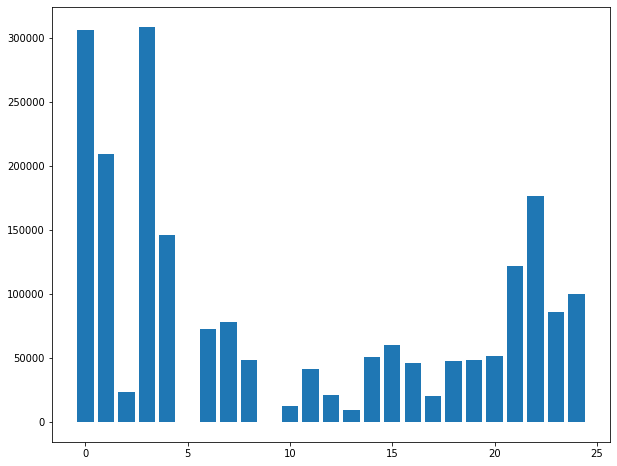

In [9]:
plt.figure(figsize=(10,8))  # data Exporatary Analysis(EDA) thought graph
plt.bar(df.Offence,df['Rolling year total number of offences'])

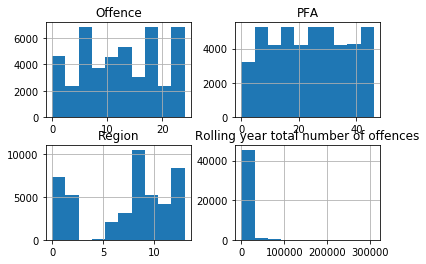

In [10]:
df.hist()   # data Exporatary Analysis(EDA) thought graph
plt.show()

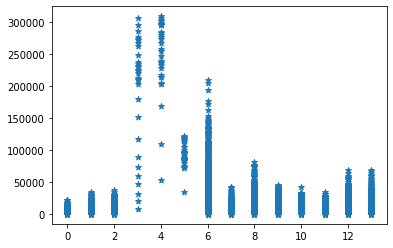

In [11]:
plt.scatter(df.Region,df['Rolling year total number of offences'],marker='*') 
plt.show()  # data Exporatary Analysis(EDA) thought graph

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [45]:
from sklearn.ensemble import RandomForestRegressor # Creatiing  the model
model_r=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.01, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)   # Creatiing  the model

In [46]:
model_r.fit(x_train,y_train)  # Training the model with the training data set

c:\users\moula\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.01, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [50]:
model_r.score(x_train,y_train)

0.9085469626152697

In [48]:
model_Predicated['Actual values']=y_test.values

In [49]:
model_Predicated.head()

,Predicted values,Actual values
0,3749.187192,1957
1,5598.470842,1137
2,1504.406688,1328
3,3146.514974,6770
4,11.266746,13


In [57]:
from sklearn.metrics import accuracy_score,r2_score
r2_score(y_pred,y_test) 

0.8693699295923638